#  CRYPTO PRICE PREDICTION USING LSTM AND GRU

In [1]:
# Installing Kaleido library
# For generating interactive plots from Plotly, Matplotlib, etc
!pip install -U kaleido

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 8.1 MB/s eta 0:00:00


In [2]:
# Importing necessary libraries
import pandas as pd # for data manipulation and analysis
import plotly.graph_objects as go # for interactive visualization of historical data
import plotly.io as pio # for exporting plots
from plotly.subplots import make_subplots #  for creating subplots
from IPython.display import Image # for displaying plots
import numpy as np # for data manipulation
from sklearn.preprocessing import MinMaxScaler # for data preprocessing
import matplotlib.pyplot as plt # for data visualization
import tensorflow as tf # for building and training LSTM and GRU model
from sklearn.metrics import mean_squared_error, mean_absolute_error # for evaluating model performance
import math # for mathematical operations
import time # for time-related operations
%matplotlib inline

In [3]:
# Importing cryptocurrencies historical prices datasets
# the "Date" column will be parsed as a datetime object
data_usdt = pd.read_csv('/content/Tether Hist Data.csv', parse_dates = ['Date']) # USDT
data_btc = pd.read_csv('/content/Bitcoin Hist Data.csv', parse_dates = ['Date']) # BTC
data_ltc = pd.read_csv('/content/Litecoin Hist Data.csv', parse_dates = ['Date']) # LTC
data_eth = pd.read_csv('/content/Ethereum Hist Data.csv', parse_dates = ['Date']) # ETH
data_xrp = pd.read_csv('/content/Ripple Hist Data.csv', parse_dates = ['Date']) # XRP

# Data inspection

In [4]:
data_usdt.head() # top 5 rows of USDT prices data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-11-10,1.00650,1.02423,0.995486,1.00601,1.00601,756446016
1,2017-11-11,1.00598,1.02621,0.995799,1.00899,1.00899,746227968
2,2017-11-12,1.00602,1.10591,0.967601,1.01247,1.01247,1466060032
3,2017-11-13,1.00448,1.02929,0.975103,1.00935,1.00935,767884032
4,2017-11-14,1.00524,1.01343,0.996898,1.00683,1.00683,429857984


In [5]:
data_btc.head() # top 5 rows of BTC prices data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-01-02,314.079010,315.838989,313.565002,315.032013,315.032013,7860650
1,2015-01-03,314.846008,315.149994,281.082001,281.082001,281.082001,33054400
2,2015-01-04,281.145996,287.230011,257.612000,264.195007,264.195007,55629100
3,2015-01-05,265.084015,278.341003,265.084015,274.473999,274.473999,43962800
4,2015-01-06,274.610992,287.553009,272.696014,286.188995,286.188995,23245700


In [6]:
data_ltc.head() # top 5 rows of LTC prices data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-01-02,2.69743,2.69924,2.66385,2.66736,2.66736,855392
1,2015-01-03,2.66646,2.66646,2.13316,2.13316,2.13316,5193080
2,2015-01-04,2.11022,2.15446,1.91241,1.95668,1.95668,3888140
3,2015-01-05,1.95803,2.16048,1.95803,2.08218,2.08218,10649500
4,2015-01-06,2.08434,2.11824,2.04454,2.11212,2.11212,3242950


In [7]:
data_eth.head() # top 5 rows of ETH prices data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-11-10,320.670990,324.717987,294.541992,299.252991,299.252991,885985984
1,2017-11-11,298.585999,319.453003,298.191986,314.681000,314.681000,842300992
2,2017-11-12,314.690002,319.153015,298.513000,307.907990,307.907990,1613479936
3,2017-11-13,307.024994,328.415009,307.024994,316.716003,316.716003,1041889984
4,2017-11-14,316.763000,340.177002,316.763000,337.631012,337.631012,1069680000


In [8]:
data_xrp.head() # top 5 rows of XRP prices data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-11-10,0.218256,0.219068,0.205260,0.206483,0.206483,141032992
1,2017-11-11,0.205948,0.214456,0.205459,0.210430,0.210430,134503008
2,2017-11-12,0.210214,0.210214,0.195389,0.197339,0.197339,251175008
3,2017-11-13,0.197472,0.204081,0.197456,0.203442,0.203442,132567000
4,2017-11-14,0.203679,0.213693,0.203679,0.209825,0.209825,127361000


Dataset features:
- Date: The day on which the data was recorded.
- Open: Opening crypto price on a particular day.
- High: Highest crypto price on a particular day.
- Low: Lowest crypto price on a particular day.
- Close: Closing crypto price on a particular day.
- Adj Close: Adjusted closing crypto price on a particular day. This accounts for any corporate actions like stock splits or new stock offerings.
- Volume: The number of crypto units traded on a particular day.

In [9]:
# Structure and content summary of BTC historical dataset
data_btc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3154 entries, 0 to 3153
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       3154 non-null   datetime64[ns]
 1   Open       3154 non-null   float64       
 2   High       3154 non-null   float64       
 3   Low        3154 non-null   float64       
 4   Close      3154 non-null   float64       
 5   Adj Close  3154 non-null   float64       
 6   Volume     3154 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 172.6 KB


- The Bitcoin dataset has 3154 rows.
- All columns have 3154 non-null values, indicating that there are no missing values.

In [10]:
# Structure and content summary of USDT historical dataset
data_usdt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       2111 non-null   datetime64[ns]
 1   Open       2111 non-null   float64       
 2   High       2111 non-null   float64       
 3   Low        2111 non-null   float64       
 4   Close      2111 non-null   float64       
 5   Adj Close  2111 non-null   float64       
 6   Volume     2111 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 115.6 KB


In [11]:
# summary statistics of BTC historical dataset
data_btc.describe()

,Open,High,Low,Close,Adj Close,Volume
count,3154.000000,3154.000000,3154.000000,3154.000000,3154.000000,3.154000e+03
mean,14276.410040,14619.111448,13900.320118,14283.202252,14283.202252,1.708781e+10
std,16084.003573,16481.207233,15629.388322,16080.259196,16080.259196,1.948538e+10
min,176.897003,211.731003,171.509995,178.102997,178.102997,7.860650e+06
25%,1054.910004,1082.614990,1038.152496,1056.152527,1056.152527,2.528400e+08
50%,8198.461914,8317.527832,7965.949463,8202.903808,8202.903808,1.218791e+10
75%,21671.867676,22154.021973,21152.341308,21708.694824,21708.694824,2.795114e+10
max,67549.734375,68789.625000,66382.062500,67566.828125,67566.828125,3.509679e+11


Focus is on 'Close' price column, as we'll use it as our target feature while training the models.
- The maximum closing price of bitcoin is 67566.8
- The minimum closing price is 178.1
- The mean is at 14283.2, and
- The standard deviation 16080.2, which means that bitcoin closing prices have a high variance

In [12]:
# summary statistics of UDST historical dataset
data_usdt.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2.111000e+03
mean,1.001430,1.006715,0.996844,1.001433,1.001433,3.974950e+10
std,0.005453,0.009931,0.007515,0.005408,0.005408,3.629951e+10
min,0.972522,0.978690,0.899490,0.966644,0.966644,4.298580e+08
25%,0.999983,1.000606,0.995171,0.999990,0.999990,1.247480e+10
50%,1.000405,1.002204,0.999271,1.000386,1.000386,3.198894e+10
75%,1.002147,1.010445,1.000037,1.002057,1.002057,5.712699e+10
max,1.080950,1.105910,1.021830,1.077880,1.077880,2.790675e+11


In [13]:
# Checking for missing values in the BTC historical dataset.
data_btc.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

- No missing value in data_btc dataset

In [14]:
# Checking for missing values in the USDT historical dataset.
data_usdt.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

- No missing value in data_usdt dataset

# Visualization of historical data.
The market behavior of each cryptocurrency over time.

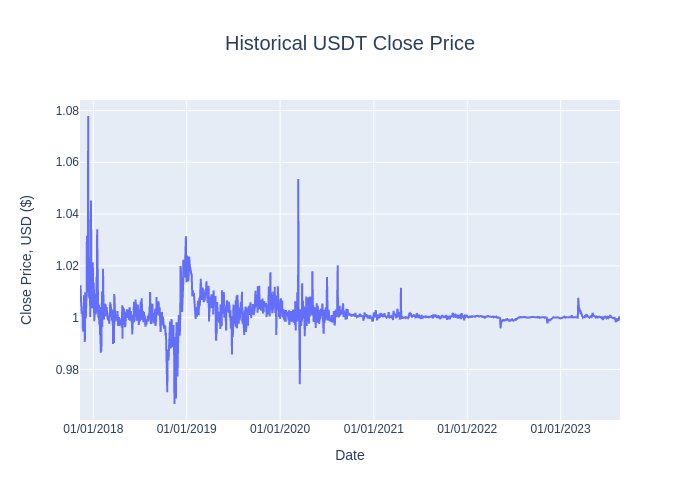

In [15]:
# Plotly USDT Close price chart
# Create the Plotly figure
fig = go.Figure(data = [go.Scatter(x = data_usdt['Date'], y = data_usdt['Close'],
                                   mode = 'lines', name = 'USDT Close Price')])

# Update layout
fig.update_layout(
    title = 'Historical USDT Close Price',
    xaxis_title = 'Date',
    yaxis_title = 'Close Price, USD ($)',
    title_x = 0.5,
    title_font_size = 20,
    xaxis_title_font_size = 14,
    yaxis_title_font_size = 14,
    xaxis = dict(tickformat = '%d/%m/%Y'),  # Format x-axis as dates
)

# Export the plot as a static image (PNG)
pio.write_image(fig, 'usdt_close_price.png')

# Display the image using Markdown
Image('usdt_close_price.png')

Historical USDT closing price trends from November 10, 2017, to August 21, 2023.

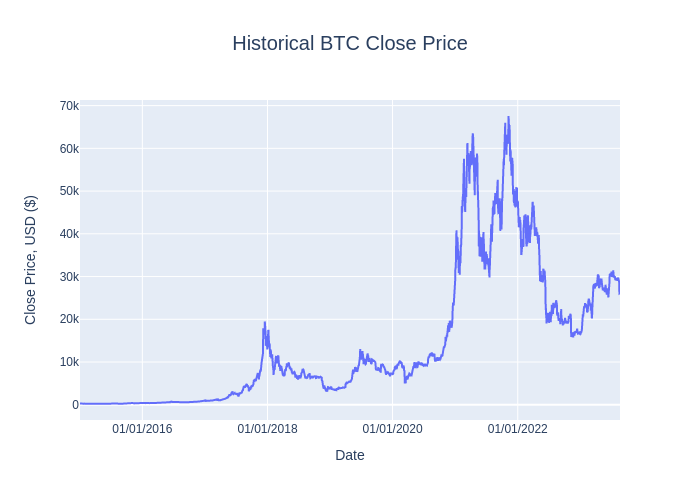

In [16]:
# Plotly BTC Close price chart
# Create the Plotly figure
fig = go.Figure(data = [go.Scatter(x = data_btc['Date'], y = data_btc['Close'],
                                   mode = 'lines', name = 'BTC Close Price')])

# Update layout
fig.update_layout(
    title = 'Historical BTC Close Price',
    xaxis_title = 'Date',
    yaxis_title = 'Close Price, USD ($)',
    title_x = 0.5,
    title_font_size = 20,
    xaxis_title_font_size = 14,
    yaxis_title_font_size = 14,
    xaxis = dict(tickformat = '%d/%m/%Y'),  # Format x-axis as dates
)

# Export the plot as a static image (PNG)
pio.write_image(fig, 'btc_close_price.png')

# Display the image using Markdown
Image('btc_close_price.png')

Historical Bitcoin closing price trends from January 02, 2015, to August 21, 2023.

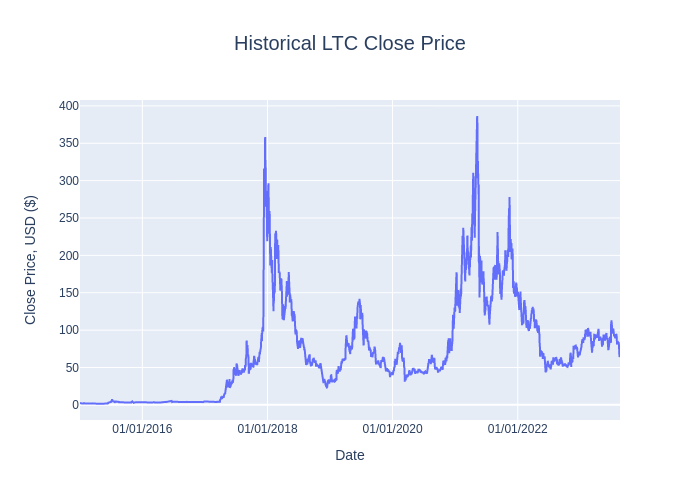

In [17]:
# Plotly LTC Close price chart
# Create the Plotly figure
fig = go.Figure(data = [go.Scatter(x = data_ltc['Date'], y = data_ltc['Close'],
                                   mode = 'lines', name = 'LTC Close Price')])

# Update layout
fig.update_layout(
    title = 'Historical LTC Close Price',
    xaxis_title = 'Date',
    yaxis_title = 'Close Price, USD ($)',
    title_x = 0.5,
    title_font_size = 20,
    xaxis_title_font_size = 14,
    yaxis_title_font_size = 14,
    xaxis = dict(tickformat = '%d/%m/%Y'),  # Format x-axis as dates
)

# Export the plot as a static image (PNG)
pio.write_image(fig, 'ltc_close_price.png')

# Display the image using Markdown
Image('ltc_close_price.png')

Historical Litecoin closing price trends from January 02, 2015, to August 21, 2023.

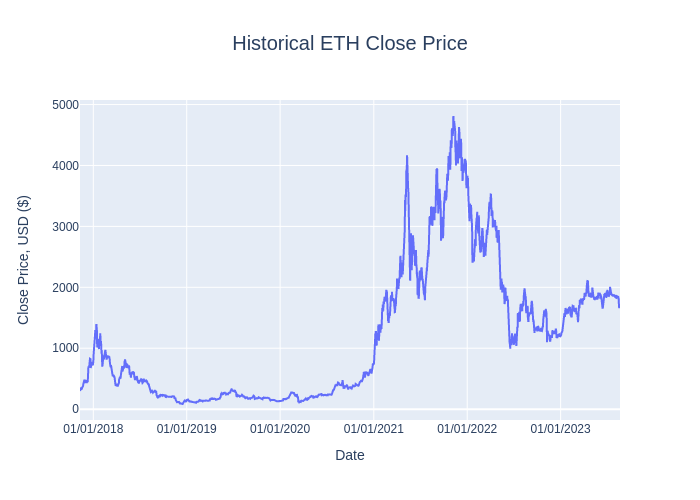

In [18]:
# Plotly ETH Close price chart
# Create the Plotly figure
fig = go.Figure(data = [go.Scatter(x = data_eth['Date'], y = data_eth['Close'],
                                   mode = 'lines', name = 'ETH Close Price')])

# Update layout
fig.update_layout(
    title = 'Historical ETH Close Price',
    xaxis_title = 'Date',
    yaxis_title = 'Close Price, USD ($)',
    title_x = 0.5,
    title_font_size = 20,
    xaxis_title_font_size = 14,
    yaxis_title_font_size = 14,
    xaxis = dict(tickformat = '%d/%m/%Y'),  # Format x-axis as dates
)

# Export the plot as a static image (PNG)
pio.write_image(fig, 'eth_close_price.png')

# Display the image using Markdown
Image('eth_close_price.png')

Historical Ethereum closing price trends from November 10, 2017, to August 21, 2023.

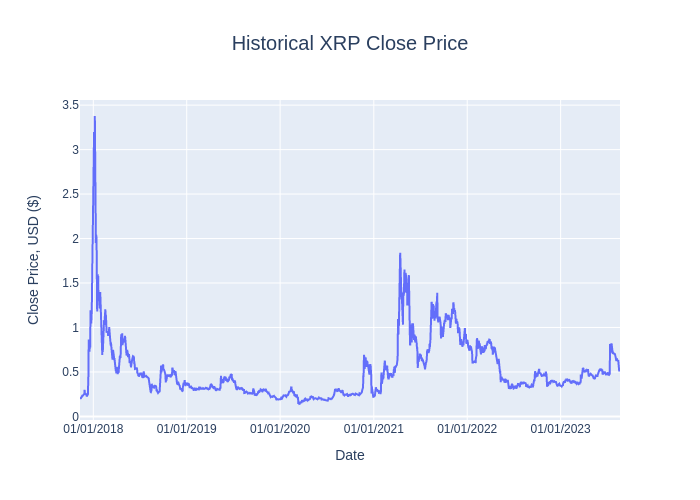

In [19]:
# Plotly XRP Close price chart
# Create the Plotly figure
fig = go.Figure(data = [go.Scatter(x = data_xrp['Date'], y = data_xrp['Close'],
                                   mode = 'lines', name = 'XRP Close Price')])

# Update layout
fig.update_layout(
    title = 'Historical XRP Close Price',
    xaxis_title = 'Date',
    yaxis_title = 'Close Price, USD ($)',
    title_x = 0.5,
    title_font_size = 20,
    xaxis_title_font_size = 14,
    yaxis_title_font_size = 14,
    xaxis = dict(tickformat = '%d/%m/%Y'),  # Format x-axis as dates
)

# Export the plot as a static image (PNG)
pio.write_image(fig, 'xrp_close_price.png')

# Display the image using Markdown
Image('xrp_close_price.png')

Historical Ripple closing price trends from November 10, 2017, to August 21, 2023.

# Data preprocessing
Tranforming the data for model building.

As the most popular cryptocurrency, we use Bitcoin dataset as the starting point for model building. Later, other cryptocurrencies will be adapted using the same procedures.

In [20]:
# set Date column as index
data_btc.set_index('Date', inplace = True)

In [21]:
data_btc.head() # first 5 rows of Bitcoin dataset

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-02,314.079010,315.838989,313.565002,315.032013,315.032013,7860650
2015-01-03,314.846008,315.149994,281.082001,281.082001,281.082001,33054400
2015-01-04,281.145996,287.230011,257.612000,264.195007,264.195007,55629100
2015-01-05,265.084015,278.341003,265.084015,274.473999,274.473999,43962800
2015-01-06,274.610992,287.553009,272.696014,286.188995,286.188995,23245700


In [22]:
# Define train_test_split() function to split the Bitcoin dataset into
# training = 80% and test = 20%
def train_test_split(data, test_size):
  train_size = len(data) - int(len(data)*test_size)
  train_set = data.iloc[:train_size]
  test_set = data.iloc[train_size:]
  return train_set, test_set
# split the data_btc dataset
train_set, test_set = train_test_split(data_btc, 0.2)

In [23]:
train_set.shape, test_set.shape

((2524, 6), (630, 6))

The Bitcoin train_set has 2524 rows and 6 columns, while the test_set has 630 rows and 6 columns.

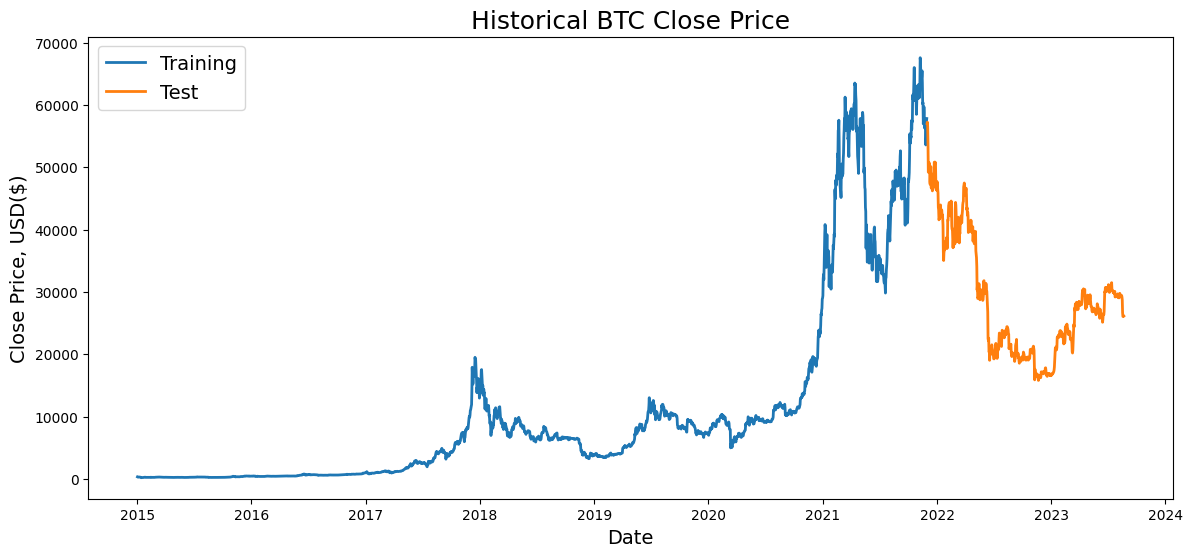

In [24]:
# Visualize the training and test portions of the Bitcoin dataset using line plot
# Simple line plot for 'Close' price column
def line_graph(firstline, secondline, label1, label2, title, lw = 2):
  fig, ax = plt.subplots(1, figsize = (14, 6))
  ax.plot(firstline, label = label1, linewidth = lw)
  ax.plot(secondline, label = label2, linewidth = lw)
  ax.set_xlabel('Date', fontsize = 14)
  ax.set_ylabel('Close Price, USD($)', fontsize = 14)
  ax.set_title(title, fontsize = 18)
  ax.legend(loc = 'upper left', fontsize = 14)
line_graph(train_set['Close'], test_set['Close'], 'Training', 'Test', 'Historical BTC Close Price')

In [25]:
# Standardize the training and test sets using MinMaxScaler() function
# This will help avoid outliers or anomalies and improve model performance
sc = MinMaxScaler(feature_range = (0, 1))
train_scaled = sc.fit_transform(train_set)
test_scaled = sc.fit_transform(test_set)

In [26]:
# Define a function to create sequences
# Define the sequence length and number of features
# Sequence length for different time intervals
n_tsteps_daily = 1  # Number of time steps in each input sequence for daily prediction
n_tsteps_weekly = 7  # Number of time steps in each input sequence for weekly prediction
n_tsteps_monthly = 30  # Number of time steps in each input sequence for monthly prediction
features = 6  # Number of columns/features in each time step

def create_sequences(data_scaled, target_col_index, n_tsteps):
  x_seq, y_seq = [], []
  for i in range(n_tsteps, len(data_scaled)):
    x_seq.append(data_scaled[i - n_tsteps:i, :])
    y_seq.append(data_scaled[i, target_col_index])
  return np.array(x_seq), np.array(y_seq)

# Create sequences for the training and test sets
target_col_index = 3 # 'Close' price
x_train_daily, y_train_daily = create_sequences(train_scaled, target_col_index, n_tsteps_daily)
x_test_daily, y_test_daily = create_sequences(test_scaled, target_col_index, n_tsteps_daily)

x_train_weekly, y_train_weekly = create_sequences(train_scaled, target_col_index, n_tsteps_weekly)
x_test_weekly, y_test_weekly = create_sequences(test_scaled, target_col_index, n_tsteps_weekly)

x_train_monthly, y_train_monthly = create_sequences(train_scaled, target_col_index, n_tsteps_monthly)
x_test_monthly, y_test_monthly = create_sequences(test_scaled, target_col_index, n_tsteps_monthly)

# Reshape the training and test sets to fit the models' input shape
x_train_daily = np.reshape(x_train_daily, (x_train_daily.shape[0], n_tsteps_daily, features))
x_test_daily = np.reshape(x_test_daily, (x_test_daily.shape[0], n_tsteps_daily, features))

x_train_weekly = np.reshape(x_train_weekly, (x_train_weekly.shape[0], n_tsteps_weekly, features))
x_test_weekly = np.reshape(x_test_weekly, (x_test_weekly.shape[0], n_tsteps_weekly, features))

x_train_monthly = np.reshape(x_train_monthly, (x_train_monthly.shape[0], n_tsteps_monthly, features))
x_test_monthly = np.reshape(x_test_monthly, (x_test_monthly.shape[0], n_tsteps_monthly, features))

# LSTM and GRU Models

Model Architecture:
1. LSTM model
- We create a sequential model using the Sequential() function from tf.keras.models to allow for the sequential addition of model layers.
- Add an LSTM layer with 128 units (neurons). We use the 'tanh' activation function to capture non-linear relationships in the sequences. We also use 'sigmoid' recurrent activation function to control the model's information flow.
- Add a Dense layer with one unit (neuron). This is the output layer.

2. GRU model
- We create a sequential model using the Sequential() function from tf.keras.models to allow for the sequential addition of model layers.
- Add an GRU layer with 128 units (neurons). We use the 'tanh' activation function to capture non-linear relationships in the sequences. We also use 'sigmoid' recurrent activation function to control the model's information flow.
- Add a Dense layer with one unit (neuron). This is the output layer.

In [29]:
# A function to build an LSTM model
# We compile the model using the 'Adam' optimizer and the 'mean_squared_error' loss function.
def build_lstm_model(n_tsteps, features):
  model = tf.keras.models.Sequential()
  model.add(tf.keras.layers.LSTM(units = 128, input_shape = (n_tsteps, features),
                                  activation = 'tanh', recurrent_activation = 'sigmoid'))
  model.add(tf.keras.layers.Dense(1))
  model.compile(optimizer = 'adam', loss = 'mean_squared_error')
  return model

In [30]:
# A function to build a GRU model
# We compile the model using the 'Adam' optimizer and the 'mean_squared_error' loss function.
def build_gru_model(n_tsteps, features):
  model = tf.keras.models.Sequential()
  model.add(tf.keras.layers.GRU(units = 128, input_shape = (n_tsteps, features),
                                activation = 'tanh', recurrent_activation = 'sigmoid'))
  model.add(tf.keras.layers.Dense(1))
  model.compile(optimizer = 'adam', loss = 'mean_squared_error')
  return model

In [31]:
# A function to train and evaluate the models
# We train the model for 100 epochs with a batch size of 64.
def train_and_evaluate_model(model, x_train, y_train, x_test, y_test, n_tsteps):
  history = model.fit(x_train, y_train, epochs = 100, batch_size = 64,
                      validation_data = (x_test, y_test), verbose = 1)

  # Predictions on the test set
  y_pred = model.predict(x_test)

  # Inverse transform to get unscaled test target and predicted values
  y_test_unscaled = sc.inverse_transform(
      np.hstack((test_scaled[n_tsteps:, :target_col_index],
                  y_test.reshape(-1, 1),
                  test_scaled[n_tsteps:, target_col_index + 1:])))[:, target_col_index]

  y_pred_unscaled = sc.inverse_transform(
      np.hstack((test_scaled[n_tsteps:, :target_col_index],
                  y_pred,
                  test_scaled[n_tsteps:, target_col_index + 1:])))[:, target_col_index]
  # Calculate RMSE
  # rmse_gru = np.sqrt(mean_squared_error(y_test_unscaled, y_pred_unscaled_gru))
  # print('The root mean squared error of GRU is {:.2f}.'.format(rmse_gru))

  # Return y_test_unscaled, y_pred_unscaled, and history
  return y_test_unscaled, y_pred_unscaled, history

In [32]:
# A function to visualize actual vs predicted values
train_size = int(len(data_btc)*0.8)
def visualize_actual_vs_predicted(y_test_unscaled, y_pred_unscaled, title, date_index):
  fig = go.Figure()
  fig.add_trace(go.Scatter(x = date_index, y = y_test_unscaled, name = 'Actual'))
  fig.add_trace(go.Scatter(x = date_index, y = y_pred_unscaled, name = 'Predicted'))
  fig.update_layout(
      title = title,
      xaxis_title = 'Date',
      yaxis_title = 'Close Price ($)',
      title_x = 0.5,
      title_font_size = 20,
      xaxis_title_font_size = 14,
      yaxis_title_font_size = 14
  )
  fig.update_xaxes(tickformat = '%d/%m/%Y')  # date format

  # Export the plot as a static image (PNG)
  image_path = title.replace(' ', '_').lower() + '.png'
  pio.write_image(fig, image_path)

  # Display the image using Markdown
  display(Image(image_path))

# LSTM daily prediction model

Epoch 1/100
40/40 [==============================] - 4s 34ms/step - loss: 0.0265 - val_loss: 0.0048
Epoch 2/100
40/40 [==============================] - 0s 12ms/step - loss: 0.0017 - val_loss: 0.0013
Epoch 3/100
40/40 [==============================] - 0s 10ms/step - loss: 2.4305e-04 - val_loss: 0.0013
Epoch 4/100
40/40 [==============================] - 0s 11ms/step - loss: 2.3330e-04 - val_loss: 0.0013
Epoch 5/100
40/40 [==============================] - 0s 10ms/step - loss: 2.2531e-04 - val_loss: 0.0012
Epoch 6/100
40/40 [==============================] - 0s 11ms/step - loss: 2.1735e-04 - val_loss: 0.0012
Epoch 7/100
40/40 [==============================] - 0s 11ms/step - loss: 2.1079e-04 - val_loss: 0.0011
Epoch 8/100
40/40 [==============================] - 1s 27ms/step - loss: 2.0449e-04 - val_loss: 0.0011
Epoch 9/100
40/40 [==============================] - 1s 24ms/step - loss: 1.9452e-04 - val_loss: 0.0010
Epoch 10/100
40/40 [==============================] - 0s 11ms/step - los

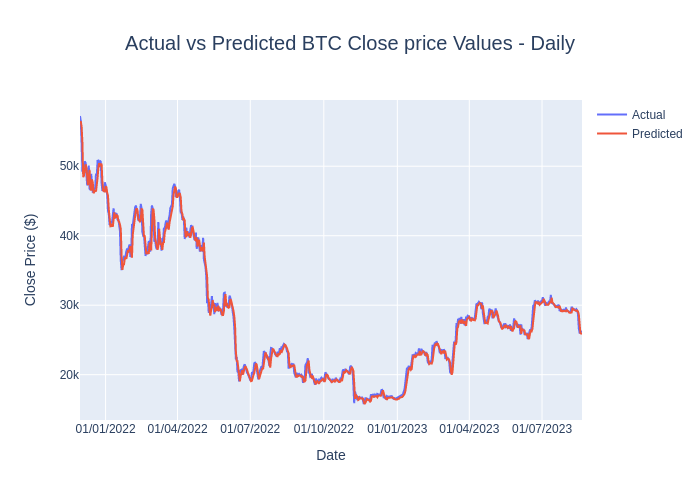

In [33]:
# LSTM Model for Daily Prediction
lstm_model_daily = build_lstm_model(n_tsteps_daily, features)
y_test_unscaled_daily, y_pred_unscaled_lstm_daily, lstm_history_daily = train_and_evaluate_model(lstm_model_daily,
                                                                                          x_train_daily, y_train_daily,
                                                                                          x_test_daily, y_test_daily, n_tsteps_daily)
# Calculate RMSE
rmse_lstm_d = np.sqrt(mean_squared_error(y_test_unscaled_daily, y_pred_unscaled_lstm_daily))
print('The root mean squared error of LSTM daily prediction is {:.2f}.'.format(rmse_lstm_d))
visualize_actual_vs_predicted(y_test_unscaled_daily, y_pred_unscaled_lstm_daily, 'Actual vs Predicted BTC Close price Values - Daily',
                              data_btc.index[train_size + n_tsteps_daily:])

# LSTM weekly prediction model

Epoch 1/100
40/40 [==============================] - 3s 32ms/step - loss: 0.0050 - val_loss: 0.0016
Epoch 2/100
40/40 [==============================] - 1s 17ms/step - loss: 4.2408e-04 - val_loss: 0.0015
Epoch 3/100
40/40 [==============================] - 1s 17ms/step - loss: 3.6587e-04 - val_loss: 0.0014
Epoch 4/100
40/40 [==============================] - 1s 34ms/step - loss: 3.6317e-04 - val_loss: 0.0013
Epoch 5/100
40/40 [==============================] - 1s 32ms/step - loss: 3.3677e-04 - val_loss: 0.0014
Epoch 6/100
40/40 [==============================] - 1s 33ms/step - loss: 3.1711e-04 - val_loss: 0.0013
Epoch 7/100
40/40 [==============================] - 1s 32ms/step - loss: 3.1098e-04 - val_loss: 0.0013
Epoch 8/100
40/40 [==============================] - 1s 32ms/step - loss: 3.0139e-04 - val_loss: 0.0012
Epoch 9/100
40/40 [==============================] - 1s 33ms/step - loss: 3.0729e-04 - val_loss: 0.0012
Epoch 10/100
40/40 [==============================] - 1s 33ms/step -

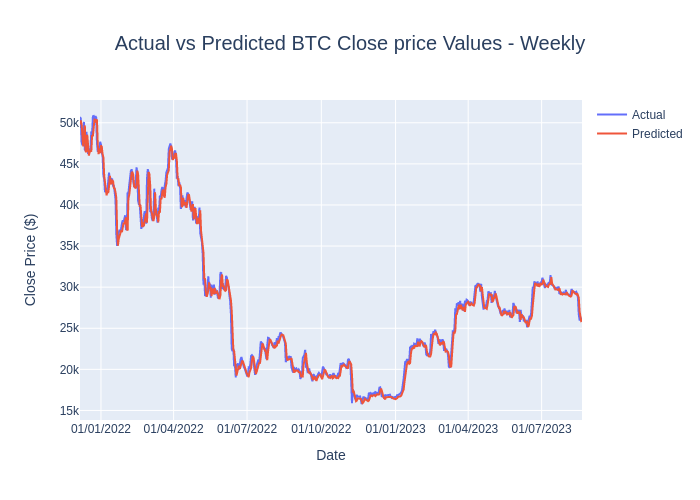

In [34]:
# LSTM Model for weekly Prediction
lstm_model_weekly = build_lstm_model(n_tsteps_weekly, features)
y_test_unscaled_weekly, y_pred_unscaled_lstm_weekly, lstm_history_weekly = train_and_evaluate_model(lstm_model_weekly,
                                                                                          x_train_weekly, y_train_weekly,
                                                                                          x_test_weekly, y_test_weekly, n_tsteps_weekly)
# Calculate RMSE
rmse_lstm_w = np.sqrt(mean_squared_error(y_test_unscaled_weekly, y_pred_unscaled_lstm_weekly))
print('The root mean squared error of LSTM weekly prediction is {:.2f}.'.format(rmse_lstm_w))
visualize_actual_vs_predicted(y_test_unscaled_weekly, y_pred_unscaled_lstm_weekly, 'Actual vs Predicted BTC Close price Values - Weekly',
                              data_btc.index[train_size + n_tsteps_weekly:])

# LSTM monthly prediction model

Epoch 1/100
39/39 [==============================] - 5s 84ms/step - loss: 0.0080 - val_loss: 0.0016
Epoch 2/100
39/39 [==============================] - 4s 101ms/step - loss: 4.2378e-04 - val_loss: 0.0015
Epoch 3/100
39/39 [==============================] - 4s 109ms/step - loss: 3.8157e-04 - val_loss: 0.0015
Epoch 4/100
39/39 [==============================] - 4s 108ms/step - loss: 3.6894e-04 - val_loss: 0.0014
Epoch 5/100
39/39 [==============================] - 3s 72ms/step - loss: 3.5731e-04 - val_loss: 0.0013
Epoch 6/100
39/39 [==============================] - 2s 52ms/step - loss: 3.6596e-04 - val_loss: 0.0017
Epoch 7/100
39/39 [==============================] - 2s 53ms/step - loss: 3.4130e-04 - val_loss: 0.0012
Epoch 8/100
39/39 [==============================] - 2s 54ms/step - loss: 3.1423e-04 - val_loss: 0.0012
Epoch 9/100
39/39 [==============================] - 2s 53ms/step - loss: 3.2675e-04 - val_loss: 0.0011
Epoch 10/100
39/39 [==============================] - 4s 92ms/ste

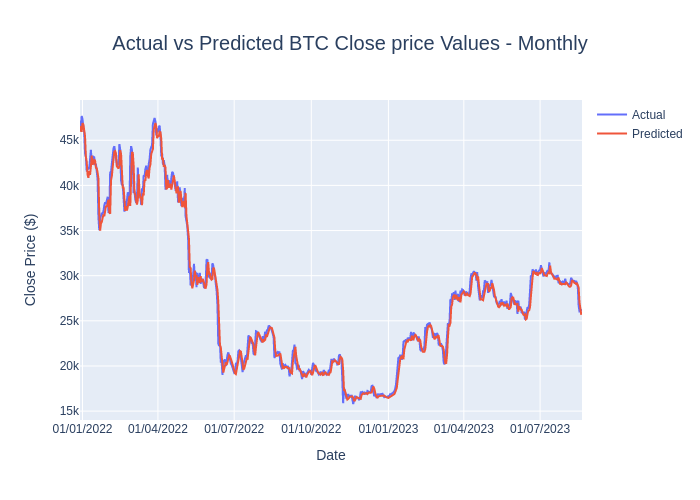

In [35]:
# LSTM Model for monthly Prediction
lstm_model_monthly = build_lstm_model(n_tsteps_monthly, features)
y_test_unscaled_monthly, y_pred_unscaled_lstm_monthly, lstm_history_monthly = train_and_evaluate_model(lstm_model_monthly,
                                                                                          x_train_monthly, y_train_monthly,
                                                                                          x_test_monthly, y_test_monthly, n_tsteps_monthly)
# Calculate RMSE
rmse_lstm_m = np.sqrt(mean_squared_error(y_test_unscaled_monthly, y_pred_unscaled_lstm_monthly))
print('The root mean squared error of LSTM monthly prediction is {:.2f}.'.format(rmse_lstm_m))
visualize_actual_vs_predicted(y_test_unscaled_monthly, y_pred_unscaled_lstm_monthly, 'Actual vs Predicted BTC Close price Values - Monthly',
                              data_btc.index[train_size + n_tsteps_monthly:])

# GRU daily prediction model

Epoch 1/100
40/40 [==============================] - 5s 28ms/step - loss: 0.0108 - val_loss: 0.0010
Epoch 2/100
40/40 [==============================] - 0s 10ms/step - loss: 2.7632e-04 - val_loss: 0.0012
Epoch 3/100
40/40 [==============================] - 0s 9ms/step - loss: 1.8185e-04 - val_loss: 0.0010
Epoch 4/100
40/40 [==============================] - 0s 8ms/step - loss: 1.6511e-04 - val_loss: 9.8384e-04
Epoch 5/100
40/40 [==============================] - 0s 9ms/step - loss: 1.6185e-04 - val_loss: 7.9154e-04
Epoch 6/100
40/40 [==============================] - 0s 10ms/step - loss: 1.5807e-04 - val_loss: 6.9274e-04
Epoch 7/100
40/40 [==============================] - 0s 10ms/step - loss: 1.5348e-04 - val_loss: 7.0836e-04
Epoch 8/100
40/40 [==============================] - 0s 10ms/step - loss: 1.4876e-04 - val_loss: 6.2767e-04
Epoch 9/100
40/40 [==============================] - 0s 9ms/step - loss: 1.4961e-04 - val_loss: 6.1494e-04
Epoch 10/100
40/40 [============================

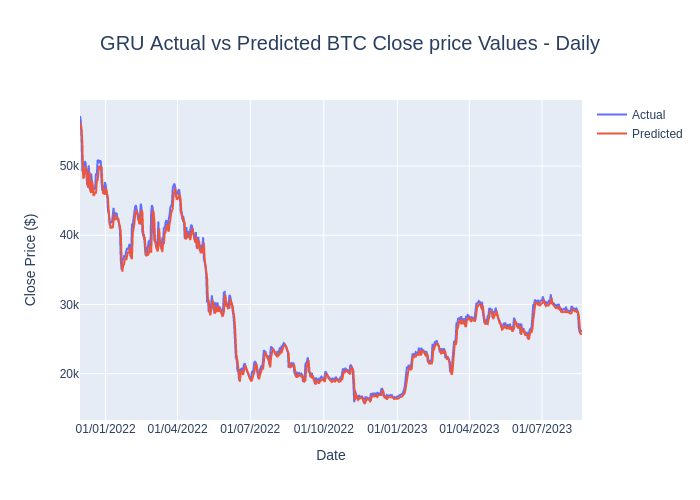

In [36]:
# GRU Model for monthly Prediction
gru_model_daily = build_gru_model(n_tsteps_daily, features)
y_test_unscaled_daily, y_pred_unscaled_gru_daily, gru_history_daily = train_and_evaluate_model(gru_model_daily,
                                                                                          x_train_daily, y_train_daily,
                                                                                          x_test_daily, y_test_daily, n_tsteps_daily)
# Calculate RMSE
rmse_gru_d = np.sqrt(mean_squared_error(y_test_unscaled_daily, y_pred_unscaled_gru_daily))
print('The root mean squared error of GRU daily prediction is {:.2f}.'.format(rmse_gru_d))
visualize_actual_vs_predicted(y_test_unscaled_daily, y_pred_unscaled_gru_daily, 'GRU Actual vs Predicted BTC Close price Values - Daily',
                              data_btc.index[train_size + n_tsteps_daily:])

# GRU weekly prediction model

Epoch 1/100
40/40 [==============================] - 5s 53ms/step - loss: 0.0072 - val_loss: 0.0015
Epoch 2/100
40/40 [==============================] - 1s 25ms/step - loss: 3.1876e-04 - val_loss: 0.0014
Epoch 3/100
40/40 [==============================] - 1s 15ms/step - loss: 2.6147e-04 - val_loss: 0.0012
Epoch 4/100
40/40 [==============================] - 1s 16ms/step - loss: 2.4128e-04 - val_loss: 0.0011
Epoch 5/100
40/40 [==============================] - 1s 15ms/step - loss: 2.3198e-04 - val_loss: 0.0011
Epoch 6/100
40/40 [==============================] - 1s 15ms/step - loss: 2.3322e-04 - val_loss: 9.1333e-04
Epoch 7/100
40/40 [==============================] - 1s 15ms/step - loss: 2.1308e-04 - val_loss: 8.8401e-04
Epoch 8/100
40/40 [==============================] - 1s 16ms/step - loss: 2.2416e-04 - val_loss: 8.6220e-04
Epoch 9/100
40/40 [==============================] - 1s 15ms/step - loss: 2.1360e-04 - val_loss: 8.4937e-04
Epoch 10/100
40/40 [==============================] 

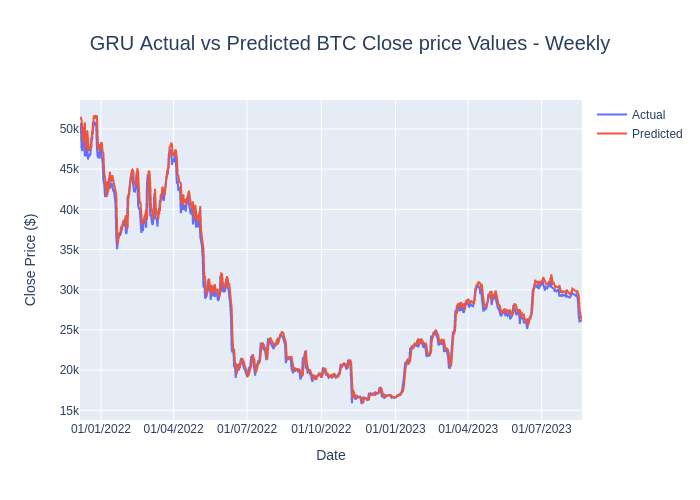

In [37]:
# GRU Model for monthly Prediction
gru_model_weekly = build_gru_model(n_tsteps_weekly, features)
y_test_unscaled_weekly, y_pred_unscaled_gru_weekly, gru_history_weekly = train_and_evaluate_model(gru_model_weekly,
                                                                                          x_train_weekly, y_train_weekly,
                                                                                          x_test_weekly, y_test_weekly, n_tsteps_weekly)
# Calculate RMSE
rmse_gru_w = np.sqrt(mean_squared_error(y_test_unscaled_weekly, y_pred_unscaled_gru_weekly))
print('The root mean squared error of GRU weekly prediction is {:.2f}.'.format(rmse_gru_w))
visualize_actual_vs_predicted(y_test_unscaled_weekly, y_pred_unscaled_gru_weekly, 'GRU Actual vs Predicted BTC Close price Values - Weekly',
                              data_btc.index[train_size + n_tsteps_weekly:])

# GRU monthly prediction model

Epoch 1/100
39/39 [==============================] - 8s 113ms/step - loss: 0.0128 - val_loss: 0.0020
Epoch 2/100
39/39 [==============================] - 3s 88ms/step - loss: 2.9850e-04 - val_loss: 9.1684e-04
Epoch 3/100
39/39 [==============================] - 3s 77ms/step - loss: 2.2198e-04 - val_loss: 9.1835e-04
Epoch 4/100
39/39 [==============================] - 2s 48ms/step - loss: 2.0720e-04 - val_loss: 7.9602e-04
Epoch 5/100
39/39 [==============================] - 2s 47ms/step - loss: 2.2042e-04 - val_loss: 7.5553e-04
Epoch 6/100
39/39 [==============================] - 2s 47ms/step - loss: 1.8666e-04 - val_loss: 7.6100e-04
Epoch 7/100
39/39 [==============================] - 2s 47ms/step - loss: 1.7847e-04 - val_loss: 7.1094e-04
Epoch 8/100
39/39 [==============================] - 2s 46ms/step - loss: 1.7539e-04 - val_loss: 6.7360e-04
Epoch 9/100
39/39 [==============================] - 3s 78ms/step - loss: 1.6958e-04 - val_loss: 6.5900e-04
Epoch 10/100
39/39 [===============

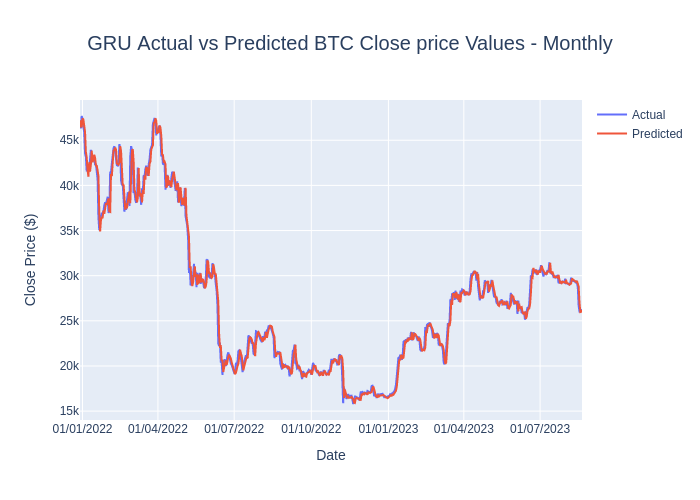

In [38]:
# GRU Model for monthly Prediction
gru_model_monthly = build_gru_model(n_tsteps_monthly, features)
y_test_unscaled_monthly, y_pred_unscaled_gru_monthly, gru_history_monthly = train_and_evaluate_model(gru_model_monthly,
                                                                                          x_train_monthly, y_train_monthly,
                                                                                          x_test_monthly, y_test_monthly, n_tsteps_monthly)
# Calculate RMSE
rmse_gru_m = np.sqrt(mean_squared_error(y_test_unscaled_monthly, y_pred_unscaled_gru_monthly))
print('The root mean squared error of GRU monthly prediction is {:.2f}.'.format(rmse_gru_m))
visualize_actual_vs_predicted(y_test_unscaled_monthly, y_pred_unscaled_gru_monthly, 'GRU Actual vs Predicted BTC Close price Values - Monthly',
                              data_btc.index[train_size + n_tsteps_monthly:])

# Saving the models

In [39]:
# Save the trained LSTM models
lstm_model_daily.save('trained_lstm_model_daily.h5')  # LSTM model for daily prediction
lstm_model_weekly.save('trained_lstm_model_weekly.h5')  # LSTM model for weekly prediction
lstm_model_monthly.save('trained_lstm_model_monthly.h5')  # LSTM model for monthly prediction

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning:

You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.



In [40]:
# Save the trained GRU models
gru_model_daily.save('trained_gru_model_daily.h5')  # GRU model for daily prediction
gru_model_weekly.save('trained_gru_model_weekly.h5')  # GRU model for weekly prediction
gru_model_monthly.save('trained_gru_model_monthly.h5')  # GRU model for monthly prediction